In [1]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile

# Task: GTEX data COMPARISON (comparison of equivalent columns )

In [99]:
'''
GTEX data set. Take a look at the same kmers to compare reccurence columns.
You need to compare only the reccurence of samples 
(compare the column GTEX_brain_testis_over0  with an equivalent column gtexCohortfilter >0.0) .

The same for columns GTEX_brain_testis_over2 equivalent to  gtexCohortfilter >=2.0
The same for columns GTEX_brain_testis_over3 equivalent to  gtexCohortfilter >=3.0
The same for columns GTEX_brain_testis_over5 equivalent to  gtexCohortfilter >=5.0
The same for columns GTEX_brain_testis_over10 equivalent to  gtexCohortfilter >=10.0

'''

'\nGTEX data set. Take a look at the same kmers to compare reccurence columns.\nYou need to compare only the reccurence of samples \n(compare the column GTEX_brain_testis_over0  with an equivalent column gtexCohortfilter >0.0) .\n\nThe same for columns GTEX_brain_testis_over2 equivalent to  gtexCohortfilter >=2.0\nThe same for columns GTEX_brain_testis_over3 equivalent to  gtexCohortfilter >=3.0\nThe same for columns GTEX_brain_testis_over5 equivalent to  gtexCohortfilter >=5.0\nThe same for columns GTEX_brain_testis_over10 equivalent to  gtexCohortfilter >=10.0\n\n'

# GTEX DATA (ETH data set) , column "gtexCohortfilter >0.0"

In [100]:
'''
“GTEx_brain_testis_over0” : Means GTEX all samples tissues including brain and testis tissues, 
count the number of samples where the kmer has expression >0

“gtexCohortfilter >0.0": Means GTEX all samples tissues including brain and testis tissues, count 
the number of samples where the kmer has expression >0
It is the same


GTEX_brain_testis_over0  with an equivalent column gtexCohortfilter >0.0? Reccurence of samples -  if the number is simalar it doesn't mean that expression is the same
Sample 1 - expession 2 (number of reads = 2)
Sample 2 -expression 4
Sample 3 -expression 0 

GTEX cohort filter >0 reccurence is equal to 2, because of 2 samples have expression more than 0)
GTEX cohor filter > or = to 3 ( Reccurence =1 because only 1 sample has expression >3)

Task: Take a look at the same kmers to compare reccurence column  
'''

'\n“GTEx_brain_testis_over0” : Means GTEX all samples tissues including brain and testis tissues, \ncount the number of samples where the kmer has expression >0\n\n“gtexCohortfilter >0.0": Means GTEX all samples tissues including brain and testis tissues, count \nthe number of samples where the kmer has expression >0\nIt is the same\n\n\nGTEX_brain_testis_over0  with an equivalent column gtexCohortfilter >0.0? Reccurence of samples -  if the number is simalar it doesn\'t mean that expression is the same\nSample 1 - expession 2 (number of reads = 2)\nSample 2 -expression 4\nSample 3 -expression 0 \n\nGTEX cohort filter >0 reccurence is equal to 2, because of 2 samples have expression more than 0)\nGTEX cohor filter > or = to 3 ( Reccurence =1 because only 1 sample has expression >3)\n\nTask: Take a look at the same kmers to compare reccurence column  \n'

In [58]:

ETH_GTEX_2COL_PATH = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/batch_to_gene.txt'
ETH_GTEX_PATH =  '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_intermediate/complete_cancer_candidates_order_r.tsv.gz'

GENE_NAMES = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6']
GENE_NAMES_10 = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6',
              'ENSG00000179403.12',
              'ENSG00000160072.20',
              'ENSG00000197785.14',
              'ENSG00000160075.12',
              'ENSG00000197530.12']

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

# plot constants
PLOT_FOLDER = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/202301_myurchikova_MT/BRCAplots/'
plt.rcParams['figure.figsize'] = [15, 15] #15
plt.rcParams['font.size'] = 15  # 15 font size for title, axises
OHSU_COLOR = 'red'
ETH_COLOR = 'green'
OHSU_ETH_COLOR = 'yellow'

def sanity_check(df, name):
    print('Dataset: {}; Number of records: {}; Number of genes: {}'.format(name, len(df), len(df['gene_id'].unique())))
def save_plot(name, folder = PLOT_FOLDER):
    figure_path = os.path.join(name, folder)
    plt.savefig(figure_path) #specify resolution and other parameters

In [3]:
eth_df = pd.read_csv(ETH_GTEX_PATH, sep = '\t')
eth_df

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,cancerCohortfilter >=2.0,cancerCohortfilter >=3.0,cancerCohortfilter >=5.0,cancerCohortfilter >=10.0,TCGAC8A12P01A11RA11507all,TCGAAOA0JM01A21RA05607all,TCGABHA18V01A11RA12D07all,TCGAA2A0D201A21RA03407all,TCGAA2A0SX01A12RA08407all,isAnnotated
0,WYITRSGIA,3290.0,1969.0,861.0,394.0,89.0,4.0,92347505:92347506:92349915:92349941:None:None,False,False,...,138,82,26,5,0.000000,0.000000,0.000000,4.102634,0.000000,NaN
1,WYITRSGIA,572.0,545.0,243.0,130.0,27.0,2.0,92347505:92347506:92349915:92349941:None:None,False,False,...,138,82,26,5,0.000000,0.000000,0.000000,4.102634,0.000000,NaN
2,ISSQSRVEK,278.0,261.0,82.0,29.0,7.0,0.0,92379851:92379859:92493866:92493885:None:None,False,False,...,10,2,0,0,0.000000,0.000000,2.474321,0.000000,0.000000,NaN
3,RSGDEEKYP,7350.0,4622.0,2653.0,1745.0,1126.0,734.0,92600493:92600508:92611313:92611325:None:None,True,True,...,641,520,348,170,2.922641,2.102386,1.237161,0.000000,0.000000,1.0
4,HLKMKMFQI,146.0,136.0,42.0,20.0,3.0,1.0,92379850:92379859:92496416:92496434:None:None,False,False,...,16,2,0,0,2.922641,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22348742,DSAVDFTGR,8409.0,7290.0,5881.0,4758.0,3323.0,1612.0,121183457:121183462:121181326:121181348:None:None,True,True,...,126,78,20,1,0.000000,0.000000,3.711482,2.735089,1.140192,1.0
22348743,LKWLLLLSL,521.0,489.0,234.0,124.0,41.0,2.0,121181270:121181278:121180861:121180880:None:None,False,False,...,5,1,0,0,0.000000,0.000000,1.237161,0.000000,0.000000,NaN
22348744,CLKWCKHPT,506.0,476.0,180.0,88.0,29.0,2.0,121181270:121181281:121168819:121168835:None:None,True,False,...,67,36,3,0,0.000000,0.000000,1.237161,0.000000,4.560769,1.0
22348745,KWLLLLSLF,521.0,489.0,234.0,124.0,41.0,2.0,121181270:121181275:121180858:121180880:None:None,False,False,...,5,1,0,0,0.000000,0.000000,1.237161,0.000000,0.000000,NaN


In [4]:
print(eth_df.columns)

Index(['kmer', 'gtexCohortfilter >0.0', 'gtexCohortfilter >=1.0',
       'gtexCohortfilter >=2.0', 'gtexCohortfilter >=3.0',
       'gtexCohortfilter >=5.0', 'gtexCohortfilter >=10.0', 'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 'cancerCohortfilter >=1.0',
       'cancerCohortfilter >=2.0', 'cancerCohortfilter >=3.0',
       'cancerCohortfilter >=5.0', 'cancerCohortfilter >=10.0',
       'TCGAC8A12P01A11RA11507all', 'TCGAAOA0JM01A21RA05607all',
       'TCGABHA18V01A11RA12D07all', 'TCGAA2A0D201A21RA03407all',
       'TCGAA2A0SX01A12RA08407all', 'isAnnotated'],
      dtype='object')


In [5]:
eth_df[['batch', 'coord', 'gtexCohortfilter >0.0']]

,batch,coord,gtexCohortfilter >0.0
0,56543,92347505:92347506:92349915:92349941:None:None,3290.0
1,56543,92347505:92347506:92349915:92349941:None:None,572.0
2,56543,92379851:92379859:92493866:92493885:None:None,278.0
3,56543,92600493:92600508:92611313:92611325:None:None,7350.0
4,56543,92379850:92379859:92496416:92496434:None:None,146.0
...,...,...,...
22348742,2858,121183457:121183462:121181326:121181348:None:None,8409.0
22348743,2858,121181270:121181278:121180861:121180880:None:None,521.0
22348744,2858,121181270:121181281:121168819:121168835:None:None,506.0
22348745,2858,121181270:121181275:121180858:121180880:None:None,521.0


# MERGE DATA OF TWO DATAFRAMES GTEX_df and batch_to_gene.txt

In [6]:
'''
There is a “gene <-> batch number” table
/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/batch_to_gene.txt
You can merge it on the batch number
'''
df = pd.read_csv(ETH_GTEX_2COL_PATH, sep=',', header=0)
df.columns = ['gene_id', 'batch']
df

,gene_id,batch
0,ENSG00000062282.15,10000
1,ENSG00000198382.9,10004
2,ENSG00000085741.13,10012
3,ENSG00000137492.8,10015
4,ENSG00000179240.11,10016
...,...,...
19691,ENSG00000149243.15,9988
19692,ENSG00000158555.15,9989
19693,ENSG00000149257.14,9991
19694,ENSG00000171533.11,9993


In [7]:
eth_df_merged = pd.merge(eth_df, df, how='inner', on='batch')
eth_df_merged

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,cancerCohortfilter >=3.0,cancerCohortfilter >=5.0,cancerCohortfilter >=10.0,TCGAC8A12P01A11RA11507all,TCGAAOA0JM01A21RA05607all,TCGABHA18V01A11RA12D07all,TCGAA2A0D201A21RA03407all,TCGAA2A0SX01A12RA08407all,isAnnotated,gene_id
0,WYITRSGIA,3290.0,1969.0,861.0,394.0,89.0,4.0,92347505:92347506:92349915:92349941:None:None,False,False,...,82,26,5,0.000000,0.000000,0.000000,4.102634,0.000000,NaN,ENSG00000188312.14
1,WYITRSGIA,572.0,545.0,243.0,130.0,27.0,2.0,92347505:92347506:92349915:92349941:None:None,False,False,...,82,26,5,0.000000,0.000000,0.000000,4.102634,0.000000,NaN,ENSG00000188312.14
2,ISSQSRVEK,278.0,261.0,82.0,29.0,7.0,0.0,92379851:92379859:92493866:92493885:None:None,False,False,...,2,0,0,0.000000,0.000000,2.474321,0.000000,0.000000,NaN,ENSG00000188312.14
3,RSGDEEKYP,7350.0,4622.0,2653.0,1745.0,1126.0,734.0,92600493:92600508:92611313:92611325:None:None,True,True,...,520,348,170,2.922641,2.102386,1.237161,0.000000,0.000000,1.0,ENSG00000188312.14
4,HLKMKMFQI,146.0,136.0,42.0,20.0,3.0,1.0,92379850:92379859:92496416:92496434:None:None,False,False,...,2,0,0,2.922641,0.000000,0.000000,0.000000,0.000000,NaN,ENSG00000188312.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22348666,DSAVDFTGR,8409.0,7290.0,5881.0,4758.0,3323.0,1612.0,121183457:121183462:121181326:121181348:None:None,True,True,...,78,20,1,0.000000,0.000000,3.711482,2.735089,1.140192,1.0,ENSG00000188610.12
22348667,LKWLLLLSL,521.0,489.0,234.0,124.0,41.0,2.0,121181270:121181278:121180861:121180880:None:None,False,False,...,1,0,0,0.000000,0.000000,1.237161,0.000000,0.000000,NaN,ENSG00000188610.12
22348668,CLKWCKHPT,506.0,476.0,180.0,88.0,29.0,2.0,121181270:121181281:121168819:121168835:None:None,True,False,...,36,3,0,0.000000,0.000000,1.237161,0.000000,4.560769,1.0,ENSG00000188610.12
22348669,KWLLLLSLF,521.0,489.0,234.0,124.0,41.0,2.0,121181270:121181275:121180858:121180880:None:None,False,False,...,1,0,0,0.000000,0.000000,1.237161,0.000000,0.000000,NaN,ENSG00000188610.12


In [8]:
eth_df_merged[['gene_id', 'kmer', 'coord', 'batch', 'gtexCohortfilter >0.0']]

,gene_id,kmer,coord,batch,gtexCohortfilter >0.0
0,ENSG00000188312.14,WYITRSGIA,92347505:92347506:92349915:92349941:None:None,56543,3290.0
1,ENSG00000188312.14,WYITRSGIA,92347505:92347506:92349915:92349941:None:None,56543,572.0
2,ENSG00000188312.14,ISSQSRVEK,92379851:92379859:92493866:92493885:None:None,56543,278.0
3,ENSG00000188312.14,RSGDEEKYP,92600493:92600508:92611313:92611325:None:None,56543,7350.0
4,ENSG00000188312.14,HLKMKMFQI,92379850:92379859:92496416:92496434:None:None,56543,146.0
...,...,...,...,...,...
22348666,ENSG00000188610.12,DSAVDFTGR,121183457:121183462:121181326:121181348:None:None,2858,8409.0
22348667,ENSG00000188610.12,LKWLLLLSL,121181270:121181278:121180861:121180880:None:None,2858,521.0
22348668,ENSG00000188610.12,CLKWCKHPT,121181270:121181281:121168819:121168835:None:None,2858,506.0
22348669,ENSG00000188610.12,KWLLLLSLF,121181270:121181275:121180858:121180880:None:None,2858,521.0


In [9]:
eth_df = eth_df_merged

In [10]:
print(sum(eth_df.duplicated()))

7063419


# ETH columns renaming, filtering

In [41]:
'''
OLD COLUMN NAMES
# Rename columns
columns_names = {
    'gtexCohortfilter >0.0' : 'GTEx_brain_testis_over0',
    'gtexCohortfilter >=2.0' : 'GTEx_brain_testis_over2',
    'gtexCohortfilter >=3.0' : 'GTEx_brain_testis_over3',
    'gtexCohortfilter >=5.0' : 'GTEx_brain_testis_over5',
    'gtexCohortfilter >=10.0' : 'GTEx_brain_testis_over10'}
eth_df.rename(columns = columns_names, inplace = True)
gtex_columns = list(columns_names.values())
gtex_columns

'''

['GTEx_brain_testis_over0',
 'GTEx_brain_testis_over2',
 'GTEx_brain_testis_over3',
 'GTEx_brain_testis_over5',
 'GTEx_brain_testis_over10']

In [11]:
# Rename columns
columns_names = {
    'gtexCohortfilter >0.0' : 'GTEx_brain_testis_over0',
    'gtexCohortfilter >=2.0' : 'GTEx_brain_testis_over2',
    'gtexCohortfilter >=3.0' : 'GTEx_brain_testis_over3',
    'gtexCohortfilter >=5.0' : 'GTEx_brain_testis_over5',
    'gtexCohortfilter >=10.0' : 'GTEx_brain_testis_over10'}
eth_df.rename(columns = columns_names, inplace = True)
gtex_columns = list(columns_names.values())
gtex_columns

['GTEx_brain_testis_over0',
 'GTEx_brain_testis_over2',
 'GTEx_brain_testis_over3',
 'GTEx_brain_testis_over5',
 'GTEx_brain_testis_over10']

In [110]:
'''
NEW COLUMN NAMES

# Rename columns
columns_names = {
    'gtexCohortfilter >0.0' : 'GTEx_brain_testis_over0',
    'gtexCohortfilter >=1.0' : 'GTEx_brain_testis_over1',
    'gtexCohortfilter >=3.0' : 'GTEx_brain_testis_over3'}
eth_df.rename(columns = columns_names, inplace = True)
gtex_columns = list(columns_names.values())
gtex_columns

'''

['GTEx_brain_testis_over0',
 'GTEx_brain_testis_over1',
 'GTEx_brain_testis_over3']

In [12]:
cols = ['gene_id', 'kmer', 'coord'] + gtex_columns
eth_df = eth_df[cols]

In [13]:
# ETH has duplicates
print(sum(eth_df.duplicated()))

7886422


In [14]:
## Filter dataset: skip if you want analyzie full dataset
eth_df = eth_df[eth_df['gene_id'].isin(GENE_NAMES)]
sanity_check(eth_df, 'ETH')

Dataset: ETH; Number of records: 5935; Number of genes: 5


In [15]:
# ETH has duplicates
print(sum(eth_df.duplicated()))
eth_df = eth_df.drop_duplicates()

1654


In [16]:
eth_df.head()

,gene_id,kmer,coord,GTEx_brain_testis_over0,GTEx_brain_testis_over2,GTEx_brain_testis_over3,GTEx_brain_testis_over5,GTEx_brain_testis_over10
517232,ENSG00000242485.6,LKKKNMRTT,1406908:1406932:1406343:1406346:None:None,8833.0,8338.0,7903.0,6623.0,3861.0
517233,ENSG00000242485.6,MRTTESRAV,1406908:1406917:1406328:1406346:None:None,8833.0,8338.0,7903.0,6623.0,3861.0
517234,ENSG00000242485.6,KKNMRTTES,1406908:1406926:1406337:1406346:None:None,8833.0,8338.0,7903.0,6623.0,3861.0
517235,ENSG00000242485.6,NMRTTESRA,1406908:1406920:1406331:1406346:None:None,8833.0,8338.0,7903.0,6623.0,3861.0
517236,ENSG00000242485.6,SRVTVTAAL,1406225:1406247:1405881:1405886:None:None,9393.0,9371.0,9329.0,9122.0,8003.0


# GTEX DATA (OHSU data set) column "GTEx_brain_testis_over0"

In [17]:
#OLD OHSU GTEx data set:

OHSU_GTEX_PATH = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/OHSU_Feb2023_complete-annotated-shortlist.tsv.gz'

In [169]:
#new OHSU_GTEX_PATH = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/Apr23_uniprot-filter-update_annotated_all_sample_shortlist.tsv.gz'

In [18]:
ohsu_df=pd.read_csv(OHSU_GTEX_PATH, sep = '\t', low_memory=False)
ohsu_df.rename(columns = {'in-frame_neoepitopes': 'kmer'}, inplace = True)
sanity_check(ohsu_df, 'OHSU')
ohsu_df

Dataset: OHSU; Number of records: 1347000; Number of genes: 18230


,jx,TCGA-24-1431-01A-01R-1566-13,TCGA-24-2298-01A-01R-1569-13,TCGA-25-1313-01A-01R-1565-13,TCGA-25-1319-01A-01R-1565-13,TCGA-61-2008-01A-02R-1568-13,TCGA-A2-A0D2-01A-21R-A034-07,TCGA-A2-A0SX-01A-12R-A084-07,TCGA-AO-A0JM-01A-21R-A056-07,TCGA-BH-A18V-01A-11R-A12D-07,...,modified_upstream_txs,in-frame_all-transcript_biexons,in-frame_nonhanging-tx_biexons,in-frame_peptide_sequence,hanging_txs_included_inframe_pepseqs,prefiltered_in-frame_epitopes,prefiltered_inframe_epitope_count,kmer,in-frame_neoepitope_count,frame-agnostic_all-transcript_biexons
0,chr10;48726;48803;-,0.000000,2.176140,0.842293,2.517914,0.961344,0.000000,5.700962,2.102386,1.237161,...,['ENST00000561967.1.MOD.CHR10.48726.48803.MINU...,LTQIGQCGNQIGAKFWEVISDEHAIDSAGTYHGDSHLQLERINVYY...,MNMPSTPLAPTTGTATCSWSASTCTTTRPAVAGQCGAGNNWAKGHY...,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASG;VYYNEASGG;YYNEASGGR;YNEASGGRY;NEASGG...,17.0,TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG,5.0,LTQIGQCGNQIGAKFWEVISDEHAIDSAGTYHGDSHLQLERINVYY...
1,chr10;277578;281199;-,2.295572,30.465966,16.003571,10.071656,26.917642,51.966700,53.589040,31.535793,50.723584,...,['ENST00000280886.12.MOD.CHR10.277578.281199.M...,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,RAHKSVTECAVFTWTNL,RAHKSVTECAVFTWTNL,RAHKSVTEC;AHKSVTECA;HKSVTECAV;KSVTECAVF;SVTECA...,9.0,NaN,0.0,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...
2,chr10;280261;281199;-,0.000000,0.000000,0.000000,0.000000,0.961344,0.000000,0.000000,6.307159,2.474321,...,['ENST00000280886.12.MOD.CHR10.280261.281199.M...,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,RAHKSVTEC,RAHKSVTEC,RAHKSVTEC,1.0,NaN,0.0,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...
3,chr10;281324;283271;-,3.443358,23.212165,18.530451,15.107483,20.188231,32.821074,33.065578,44.150110,40.826300,...,['ENST00000280886.12.MOD.CHR10.281324.283271.M...,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...,TELTDANGERHDALYVV,TELTDANGERHDALYVV,TELTDANGE;ELTDANGER;LTDANGERH;TDANGERHD;DANGER...,9.0,NaN,0.0,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...
4,chr10;283447;286272;-,1.147786,41.346668,19.372744,6.714437,28.840330,61.539513,62.710579,37.842952,92.787044,...,['ENST00000280886.12.MOD.CHR10.283447.286272.M...,ALRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDS...,ALRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDS...,LGDSHLGEIWVHSAHN,LGDSHLGEIWVHSAHN,LGDSHLGEI;GDSHLGEIW;DSHLGEIWV;SHLGEIWVH;HLGEIW...,8.0,NaN,0.0,ALRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346995,chr2;109934895;109947363;+,14.921219,3.626901,175.196991,87.287682,1.922689,0.000000,1.140192,2.102386,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346996,chr2;109987191;109987560;+,34.433582,53.678131,138.136089,42.804536,61.526038,21.880716,92.355580,8.409545,44.537781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346997,chr2;109987191;109993691;+,0.000000,1.450760,1.684586,1.678609,0.000000,0.000000,1.140192,2.102386,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346998,chr2;109987191;109994400;+,16.069005,5.077661,5.053759,10.071656,8.652099,9.572813,4.560769,10.511931,8.660124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ohsu_df.columns

Index(['jx', 'TCGA-24-1431-01A-01R-1566-13', 'TCGA-24-2298-01A-01R-1569-13',
       'TCGA-25-1313-01A-01R-1565-13', 'TCGA-25-1319-01A-01R-1565-13',
       'TCGA-61-2008-01A-02R-1568-13', 'TCGA-A2-A0D2-01A-21R-A034-07',
       'TCGA-A2-A0SX-01A-12R-A084-07', 'TCGA-AO-A0JM-01A-21R-A056-07',
       'TCGA-BH-A18V-01A-11R-A12D-07', 'TCGA-C8-A12P-01A-11R-A115-07',
       'GTEx_brain_testis_over0', 'GTEx_brain_testis_over1',
       'GTEx_brain_testis_over10', 'GTEx_brain_testis_over2',
       'GTEx_brain_testis_over3', 'GTEx_brain_testis_over5',
       'GTEx_breast_over0', 'GTEx_breast_over1', 'GTEx_breast_over10',
       'GTEx_breast_over2', 'GTEx_breast_over3', 'GTEx_breast_over5',
       'GTEx_core_over0', 'GTEx_core_over1', 'GTEx_core_over10',
       'GTEx_core_over2', 'GTEx_core_over3', 'GTEx_core_over5',
       'GTEx_ovary_over0', 'GTEx_ovary_over1', 'GTEx_ovary_over10',
       'GTEx_ovary_over2', 'GTEx_ovary_over3', 'GTEx_ovary_over5',
       'all_TCGA_over0', 'all_TCGA_over1', 'all_TC

In [20]:
ohsu_df[['gene_id', 'kmer', 'GTEx_brain_testis_over0', 'jx']]

,gene_id,kmer,GTEx_brain_testis_over0,jx
0,ENSG00000261456.5,TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG,515.0,chr10;48726;48803;-
1,ENSG00000151240.17,NaN,1604.0,chr10;277578;281199;-
2,ENSG00000151240.17,NaN,206.0,chr10;280261;281199;-
3,ENSG00000151240.17,NaN,1603.0,chr10;281324;283271;-
4,ENSG00000151240.17,NaN,1605.0,chr10;283447;286272;-
...,...,...,...,...
1346995,NaN,NaN,183.0,chr2;109934895;109947363;+
1346996,NaN,NaN,839.0,chr2;109987191;109987560;+
1346997,NaN,NaN,73.0,chr2;109987191;109993691;+
1346998,NaN,NaN,1290.0,chr2;109987191;109994400;+


In [21]:
cols = ['gene_id', 'kmer', 'jx'] + gtex_columns
ohsu_df = ohsu_df[cols]

In [22]:
# OHSU does not have duplicates
print(sum(ohsu_df.duplicated()))

0


In [23]:
## Filter dataset: skip if you want analyzie full dataset
ohsu_df = ohsu_df[ohsu_df['gene_id'].isin(GENE_NAMES)]
sanity_check(ohsu_df, 'OHSU')

Dataset: OHSU; Number of records: 447; Number of genes: 5


In [24]:
# OHSU does not have duplicates
print(sum(ohsu_df.duplicated()))

0


In [25]:
def preprocess_ohsu(df):
    pd.options.mode.chained_assignment = None  # default='warn'
    df = df[df['gene_id'].notna()]
    df = df[df['kmer'].notna()]
    df.loc[:, 'kmer'] = df['kmer'].apply(lambda s: s.split(';'))
    df = df.explode('kmer')
    df.loc[:, 'gene_id'] = df['gene_id'].apply(lambda s: s.split(','))
    df = df.explode('gene_id')
    return df
ohsu_df = preprocess_ohsu(ohsu_df)

In [26]:
# OHSU have duplicates
print(sum(ohsu_df.duplicated()))
ohsu_df = ohsu_df.drop_duplicates()

150


In [27]:
sanity_check(ohsu_df, 'OHSU')
ohsu_df[['gene_id', 'kmer', 'GTEx_brain_testis_over0']]

Dataset: OHSU; Number of records: 2552; Number of genes: 5


,gene_id,kmer,GTEx_brain_testis_over0
135281,ENSG00000107404.20,YVFGDLCSM,1060.0
135281,ENSG00000107404.20,VFGDLCSMA,1060.0
135281,ENSG00000107404.20,FGDLCSMAP,1060.0
135281,ENSG00000107404.20,GDLCSMAPV,1060.0
135281,ENSG00000107404.20,DLCSMAPVG,1060.0
...,...,...,...
1216584,ENSG00000189339.12,ILGEYTVET,0.0
1216584,ENSG00000189339.12,LGEYTVETG,0.0
1216584,ENSG00000189339.12,GEYTVETGF,0.0
1216584,ENSG00000189339.12,EYTVETGFH,0.0


# Filtered datasets
include only records with genes and kmer presented in both dataframe

In [28]:
import tqdm
def common_genes(ohsu_df, eth_df):
    g1 = ohsu_df['gene_id'].unique()
    print("OHSU number of genes:", len(g1))
    g2 = eth_df['gene_id'].unique()
    print("ETH number of genes:", len(g2))
    gene_names = list(set(g1) & set(g2))
    print("Number of common genes:", len(gene_names))
    return gene_names
gene_names_intersection = common_genes(ohsu_df, eth_df)
def filter_df_common_kmers(df1, df2):
    '''
    Filter input datframes, so that they have only records with common pairs gene + kmer
    '''
    print('Initials sizes: ', len(df1), len(df2))
    gene_names = common_genes(df1, df2)
    df1 = df1[df1['gene_id'].isin(gene_names)]
    df1_grouped = df1.groupby('gene_id')
    df2 = df2[df2['gene_id'].isin(gene_names)]
    df2_grouped = df2.groupby('gene_id')
    dfs1 = []
    dfs2 = []
    for gene in tqdm.tqdm(gene_names):
        d1 = df1_grouped.get_group(gene)
        d2 = df2_grouped.get_group(gene)
        common_kmer = set(d1['kmer']) & set(d2['kmer'])
        if len(common_kmer) == 0:
            print("There are no common kmers for gene: ", gene)
        else:
            d1 = d1[d1['kmer'].isin(common_kmer)]
            d2 = d2[d2['kmer'].isin(common_kmer)]
            d1['gene_id'] = gene
            dfs1.append(d1)
            d2['gene_id'] = gene
            dfs2.append(d2)
    df1, df2 = pd.concat(dfs1, axis=0, ignore_index=True), pd.concat(dfs2, axis=0, ignore_index=True)
    print('Result sizes: ', len(df1), len(df2))
    return df1, df2

df1 = eth_df.copy()
df2 = ohsu_df.copy()
df1, df2 = filter_df_common_kmers(df1, df2)

OHSU number of genes: 5
ETH number of genes: 5
Number of common genes: 5
Initials sizes:  4281 2552
OHSU number of genes: 5
ETH number of genes: 5
Number of common genes: 5


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 418.08it/s]

Result sizes:  2436 366


In [29]:
gene_names = common_genes(df1, df2)
gene_name = gene_names[0]

OHSU number of genes: 5
ETH number of genes: 5
Number of common genes: 5


# Preprocess ETH coord

In [30]:
import tqdm

def get_junction_coordinates(df, coordinates_col, sep=':'):
    df['strand'] = None
    df['junction_coordinate'] = None

    for idx, row in tqdm.tqdm(df.iterrows()):
        kmer_coordinates = [int(x) for x in row[coordinates_col].split(sep) if x !='None']

        if kmer_coordinates[1] < kmer_coordinates[2]: # order strand +

            df.loc[idx, 'strand'] = '+'
            if len(kmer_coordinates) == 4:  # 2 exons
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in kmer_coordinates[1:3]])
            elif len(kmer_coordinates) == 6:
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in kmer_coordinates[1:5]])
        else: # order strand +
            df.loc[idx, 'strand'] = '-'
            if len(kmer_coordinates) == 4:  # 2 exons
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in [kmer_coordinates[3],
                                                                                kmer_coordinates[0]]])
            elif len(kmer_coordinates) == 6:
                df.loc[idx, 'junction_coordinate'] = ':'.join([str(x) for x in [kmer_coordinates[3],
                                                                                kmer_coordinates[0],
                                                                                kmer_coordinates[2],
                                                                                kmer_coordinates[5]
                                                                               ]])
    return df

df1 = get_junction_coordinates(df1, 'coord')
df1[['coord', 'junction_coordinate']]

2436it [00:00, 5525.46it/s]


,coord,junction_coordinate
0,1675462:1675487:1674910:1674912:None:None,1674912:1675462
1,1675462:1675487:1674910:1674912:None:None,1674912:1675462
2,1675462:1675487:1674910:1674912:None:None,1674912:1675462
3,1675462:1675487:1674910:1674912:None:None,1674912:1675462
4,1676494:1676516:1676194:1676199:None:None,1676199:1676494
...,...,...
2431,1354353:1354363:1354192:1354209:None:None,1354209:1354353
2432,1361241:1361263:1356699:1356704:None:None,1356704:1361241
2433,1361241:1361263:1356699:1356704:None:None,1356704:1361241
2434,1361241:1361263:1356699:1356704:None:None,1356704:1361241


# Preprocess OHSU coord

In [31]:
def preprocess_ohsu_coord(df, col = 'jx', sep = ';'):
    tmp_jx = df[col].str.split(sep,  expand = True)
    df['strand'] = tmp_jx[3]
    df['junction_coordinate'] = (tmp_jx[1].astype(int) - 1).astype(str) + ':' + tmp_jx[2]
    return df
df2 = preprocess_ohsu_coord(df2)
df2[['jx', 'junction_coordinate']]

,jx,junction_coordinate
0,chr1;1670152;1675462;-,1670151:1675462
1,chr1;1670152;1675462;-,1670151:1675462
2,chr1;1670152;1675462;-,1670151:1675462
3,chr1;1670152;1675462;-,1670151:1675462
4,chr1;1670152;1675462;-,1670151:1675462
...,...,...
361,chr1;1355346;1356680;-,1355345:1356680
362,chr1;1355753;1356680;-,1355752:1356680
363,chr1;1356705;1358455;-,1356704:1358455
364,chr1;1355837;1356680;-,1355836:1356680


In [32]:
df1[['gene_id', 'kmer', 'junction_coordinate', gtex_columns[0]]].sort_values(['gene_id', 'kmer'])

,gene_id,kmer,junction_coordinate,GTEx_brain_testis_over0
243,ENSG00000107404.20,ANAVIVLLR,1338299:1338521,4099.0
321,ENSG00000107404.20,ASWGRATTV,1340152:1340246,9475.0
322,ENSG00000107404.20,ASWGRATTV,1340152:1340246,9475.0
323,ENSG00000107404.20,ASWGRATTV,1340152:1340246,9475.0
324,ENSG00000107404.20,ASWGRATTV,1340152:1340246,5034.0
...,...,...,...,...
226,ENSG00000242485.6,LKKKNMRTT,1406346:1406908,8833.0
227,ENSG00000242485.6,MRTTESRAV,1406346:1406908,8833.0
229,ENSG00000242485.6,NMRTTESRA,1406346:1406908,8833.0
233,ENSG00000242485.6,RTTESRAVT,1406346:1406908,8833.0


In [33]:
df2[['gene_id', 'kmer', 'junction_coordinate', gtex_columns[0]]].sort_values(['gene_id', 'kmer'])

,gene_id,kmer,junction_coordinate,GTEx_brain_testis_over0
80,ENSG00000107404.20,ANAVIVLLR,1338299:1338521,863.0
109,ENSG00000107404.20,ASWGRATTV,1340152:1340246,772.0
82,ENSG00000107404.20,AVIVLLRLR,1338299:1338521,863.0
74,ENSG00000107404.20,CSMAPVGLR,1338158:1338268,1060.0
97,ENSG00000107404.20,DFGVLVTGW,1348415:1348895,169.0
...,...,...,...,...
60,ENSG00000242485.6,LKKKNMRTT,1406346:1406908,1520.0
65,ENSG00000242485.6,MRTTESRAV,1406346:1406908,1520.0
64,ENSG00000242485.6,NMRTTESRA,1406346:1406908,1520.0
66,ENSG00000242485.6,RTTESRAVT,1406346:1406908,1520.0


In [34]:
sum(df1[['gene_id', 'kmer', 'junction_coordinate']].duplicated())

2071

In [35]:
df1 = df1.drop_duplicates(subset = ['gene_id', 'kmer', 'junction_coordinate'])
sum(df1[['gene_id', 'kmer', 'junction_coordinate']].duplicated())

0

In [36]:
sum(df2[['gene_id', 'kmer', 'junction_coordinate']].duplicated())

0

# Plot GTEX pairs from ETH vs OHSU datasets

In [189]:
'''
Column names description: 

“GTEx_brain_testis_over0” : Means GTEX all samples tissues including brain and testis tissues, 
count the number of samples where the kmer has expression >0

“gtexCohortfilter >0.0": Means GTEX all samples tissues including brain and testis tissues, count 
the number of samples where the kmer has expression >0
It is the same

'''

'\nColumn names description: \n\n“GTEx_brain_testis_over0” : Means GTEX all samples tissues including brain and testis tissues, \ncount the number of samples where the kmer has expression >0\n\n“gtexCohortfilter >0.0": Means GTEX all samples tissues including brain and testis tissues, count \nthe number of samples where the kmer has expression >0\nIt is the same\n\n'

In [37]:
gtex_columns

['GTEx_brain_testis_over0',
 'GTEx_brain_testis_over2',
 'GTEx_brain_testis_over3',
 'GTEx_brain_testis_over5',
 'GTEx_brain_testis_over10']

In [38]:
df = pd.merge(df1, df2, on=['gene_id', 'kmer', 'junction_coordinate'])
df[['gene_id', 'kmer', 'junction_coordinate', gtex_columns[1]+'_x', gtex_columns[1] + '_y']]

,gene_id,kmer,junction_coordinate,GTEx_brain_testis_over2_x,GTEx_brain_testis_over2_y
0,ENSG00000189339.12,RMILGEYTV,1674912:1675462,1.0,11.0
1,ENSG00000189339.12,TVIESDLGA,1676199:1676494,1001.0,54.0
2,ENSG00000189339.12,EYTEMGSRC,1673202:1675462,1387.0,307.0
3,ENSG00000189339.12,MSLKNVAVS,1675560:1676063,127.0,15.0
4,ENSG00000189339.12,TVCKMFFQK,1670151:1675462,9154.0,890.0
...,...,...,...,...,...
330,ENSG00000162576.16,AARRRRGVG,1354209:1354353,87.0,0.0
331,ENSG00000162576.16,KGMLTWRSS,1354102:1354192,9288.0,192.0
332,ENSG00000162576.16,GMLTWRSSL,1354102:1354192,9419.0,192.0
333,ENSG00000162576.16,RRGVGKVKG,1354209:1354353,87.0,0.0


In [39]:
#You don’t have all GTEX kmers but a subset with the GTEX > some value columns.
#The total number of kmers does not matter. Duplicate kmers from different junctions have different expressions. 
#Therefore they should not be dropped. 
#What is important is the kmer-junction pair

df = df.drop_duplicates(subset=['gene_id', 'kmer', 'junction_coordinate'])
df

,gene_id,kmer,coord,GTEx_brain_testis_over0_x,GTEx_brain_testis_over2_x,GTEx_brain_testis_over3_x,GTEx_brain_testis_over5_x,GTEx_brain_testis_over10_x,strand_x,junction_coordinate,jx,GTEx_brain_testis_over0_y,GTEx_brain_testis_over2_y,GTEx_brain_testis_over3_y,GTEx_brain_testis_over5_y,GTEx_brain_testis_over10_y,strand_y
0,ENSG00000189339.12,RMILGEYTV,1675462:1675487:1674910:1674912:None:None,1.0,1.0,1.0,1.0,0.0,-,1674912:1675462,chr1;1674913;1675462;-,34.0,11.0,6.0,1.0,0.0,-
1,ENSG00000189339.12,TVIESDLGA,1676494:1676516:1676194:1676199:None:None,1366.0,1001.0,789.0,363.0,29.0,-,1676199:1676494,chr1;1676200;1676494;-,74.0,54.0,41.0,17.0,1.0,-
2,ENSG00000189339.12,EYTEMGSRC,1675462:1675472:1673185:1673202:None:None,2219.0,1387.0,959.0,373.0,38.0,-,1673202:1675462,chr1;1673203;1675462;-,447.0,307.0,241.0,114.0,17.0,-
3,ENSG00000189339.12,MSLKNVAVS,1676063:1676068:1675538:1675560:None:None,235.0,127.0,83.0,21.0,1.0,-,1675560:1676063,chr1;1675561;1676063;-,34.0,15.0,8.0,0.0,0.0,-
4,ENSG00000189339.12,TVCKMFFQK,1675462:1675466:1670128:1670151:None:None,9471.0,9154.0,8608.0,7002.0,2994.0,-,1670151:1675462,chr1;1670152;1675462;-,1052.0,890.0,735.0,476.0,152.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,ENSG00000162576.16,AARRRRGVG,1354353:1354375:1354204:1354209:None:None,166.0,87.0,48.0,5.0,0.0,-,1354209:1354353,chr1;1354210;1354353;-,5.0,0.0,0.0,0.0,0.0,-
331,ENSG00000162576.16,KGMLTWRSS,1354192:1354197:1354080:1354102:None:None,9439.0,9288.0,9190.0,8912.0,8004.0,-,1354102:1354192,chr1;1354103;1354192;-,235.0,192.0,148.0,88.0,14.0,-
332,ENSG00000162576.16,GMLTWRSSL,1354192:1354194:1354077:1354102:None:None,9454.0,9419.0,9397.0,9347.0,9198.0,-,1354102:1354192,chr1;1354103;1354192;-,235.0,192.0,148.0,88.0,14.0,-
333,ENSG00000162576.16,RRGVGKVKG,1354353:1354363:1354192:1354209:None:None,166.0,87.0,48.0,5.0,0.0,-,1354209:1354353,chr1;1354210;1354353;-,5.0,0.0,0.0,0.0,0.0,-


In [193]:
# Take a look at the same kmers to compare reccurence column 
# Назвати вість х і у Recurrence(or number) of GTEx(ETH) data set samples with expression>0 
# i Recurrence(or number) of GTEx(OHSU) data set samples with expression>0 відповідно

In [194]:
'''
Звідси брати назви генів 

1.ENSG00000162576.16
2.ENSG00000189339.12
3.ENSG00000160075.12
4.ENSG00000221978.12
5.ENSG00000160072.20


GENE_NAMES = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6']
GENE_NAMES_10 = ['ENSG00000107404.20',
              'ENSG00000189339.12',
              'ENSG00000162576.16',
              'ENSG00000221978.12',
              'ENSG00000242485.6',
              'ENSG00000179403.12',
              'ENSG00000160072.20',
              'ENSG00000197785.14',
              'ENSG00000160075.12',
              'ENSG00000197530.12']

'''


"\nЗвідси брати назви генів \n\n1.ENSG00000162576.16\n2.ENSG00000189339.12\n3.ENSG00000160075.12\n4.ENSG00000221978.12\n5.ENSG00000160072.20\n\n\nGENE_NAMES = ['ENSG00000107404.20',\n              'ENSG00000189339.12',\n              'ENSG00000162576.16',\n              'ENSG00000221978.12',\n              'ENSG00000242485.6']\nGENE_NAMES_10 = ['ENSG00000107404.20',\n              'ENSG00000189339.12',\n              'ENSG00000162576.16',\n              'ENSG00000221978.12',\n              'ENSG00000242485.6',\n              'ENSG00000179403.12',\n              'ENSG00000160072.20',\n              'ENSG00000197785.14',\n              'ENSG00000160075.12',\n              'ENSG00000197530.12']\n\n"

In [40]:
nums = [0, 2, 3, 5, 10]
#nums = [0, 1, 3]
nums = [str(x) for x in nums]
gtex_columns

['GTEx_brain_testis_over0',
 'GTEx_brain_testis_over2',
 'GTEx_brain_testis_over3',
 'GTEx_brain_testis_over5',
 'GTEx_brain_testis_over10']

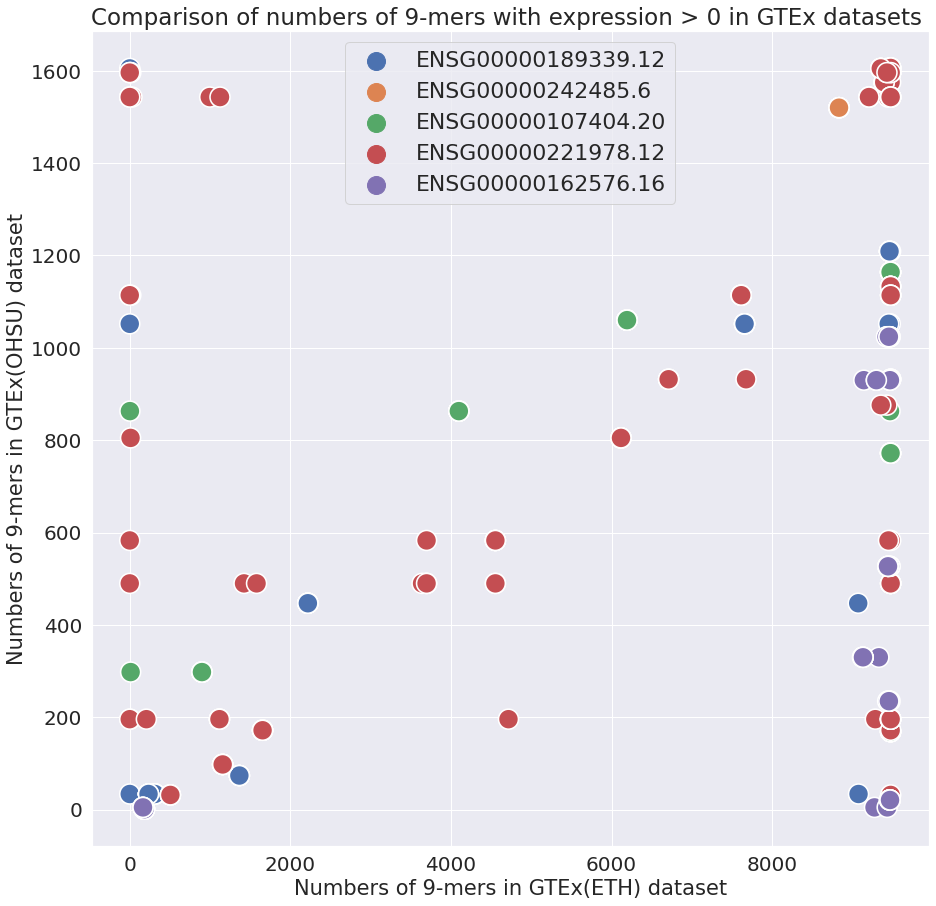

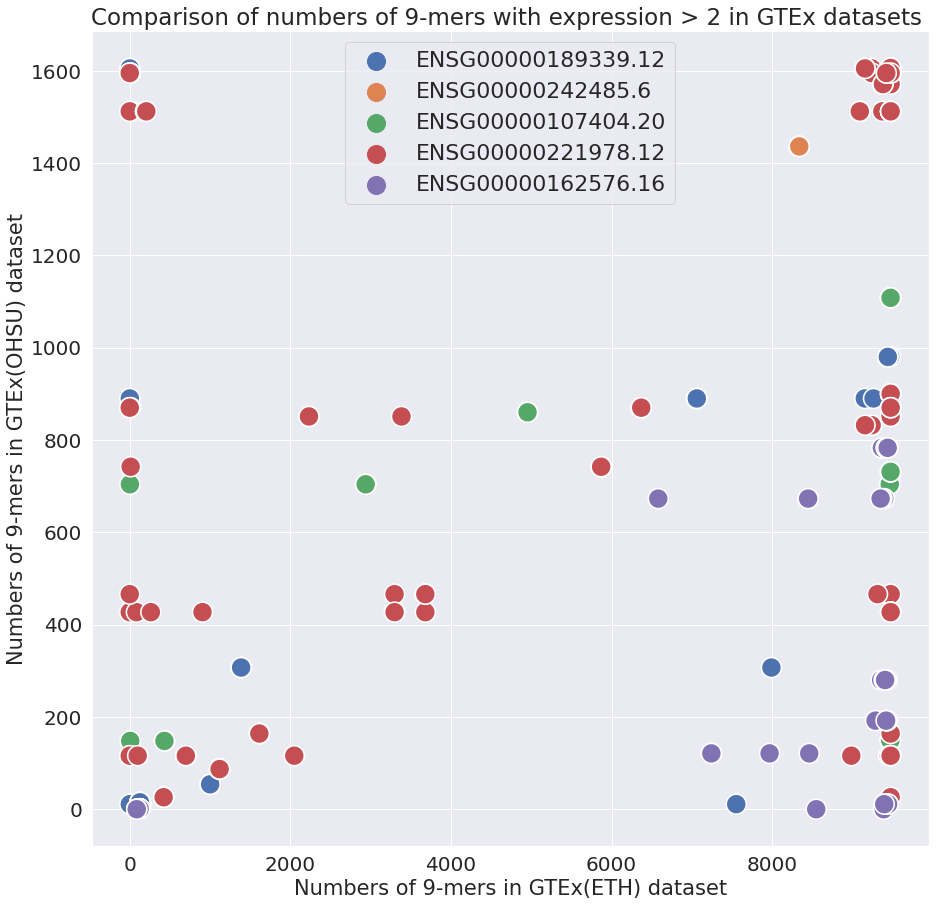

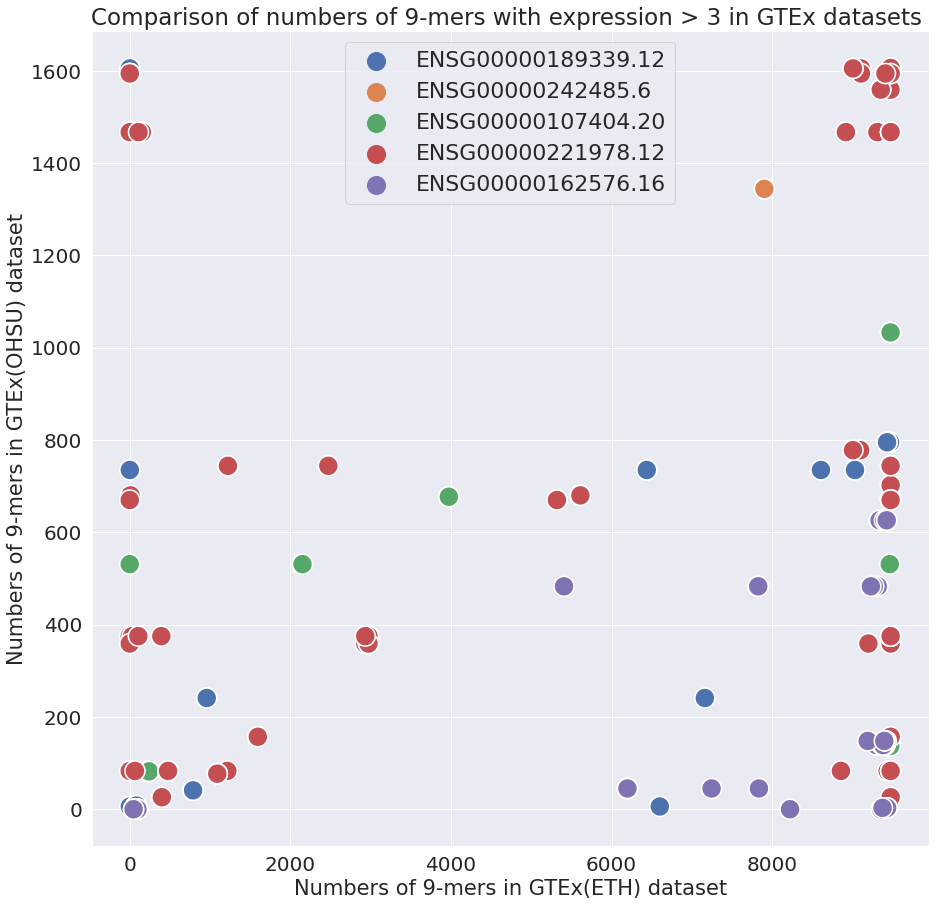

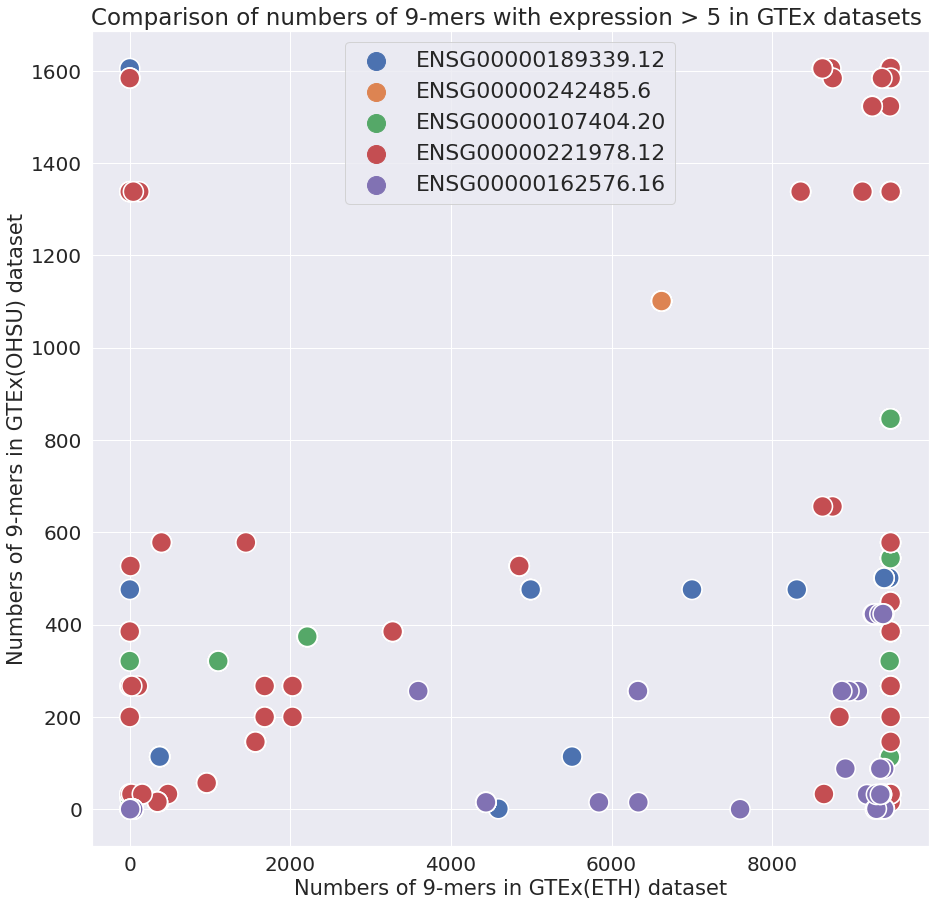

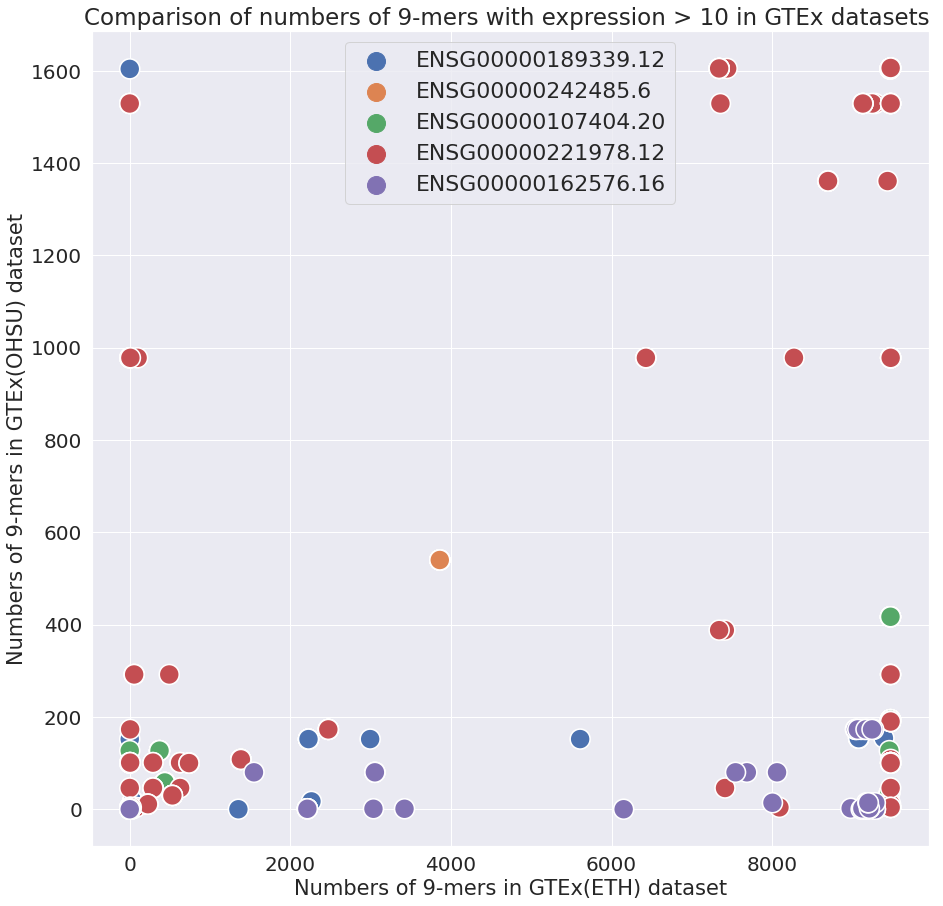

In [97]:
LANG = 'UKR'
if LANG == 'UKR':
    scatter_title = 'Comparison of numbers of 9-mers with expression > {name} in GTEx datasets '
    xlabel = 'Numbers of 9-mers in GTEx(ETH) dataset'
    ylabel = 'Numbers of 9-mers in GTEx(OHSU) dataset'
else:
    scatter_title = 'Порівняння кількості зразків kmers датасету GTEx з експресією > {name}'
    xlabel = 'Кількість kmers датасету GTEx(ETH)'
    ylabel = 'Кількість kmers датасету GTEx(OHSU)' 

def plot_scatter_gtex(df, col, name):
    ax = sns.scatterplot(x = col + '_x', y = col + '_y', data = df, hue = 'gene_id', s=400)
    plt.legend(markerscale=3, loc='upper center', fontsize=22)
    #plt.setp(ax.get_legend().get_texts()) # change size of legend text
    #plt.setp(ax.get_legend().get_title()) # change size of legend title
    plt.title(scatter_title.format(name = name), fontsize=23) #Comparison of numbers of GTEx samples with expression >0
    plt.xlabel(xlabel, fontsize=21)
    plt.ylabel(ylabel, fontsize=21)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

for gtex, num in zip(gtex_columns, nums):    
    plot_scatter_gtex(df, gtex, num)

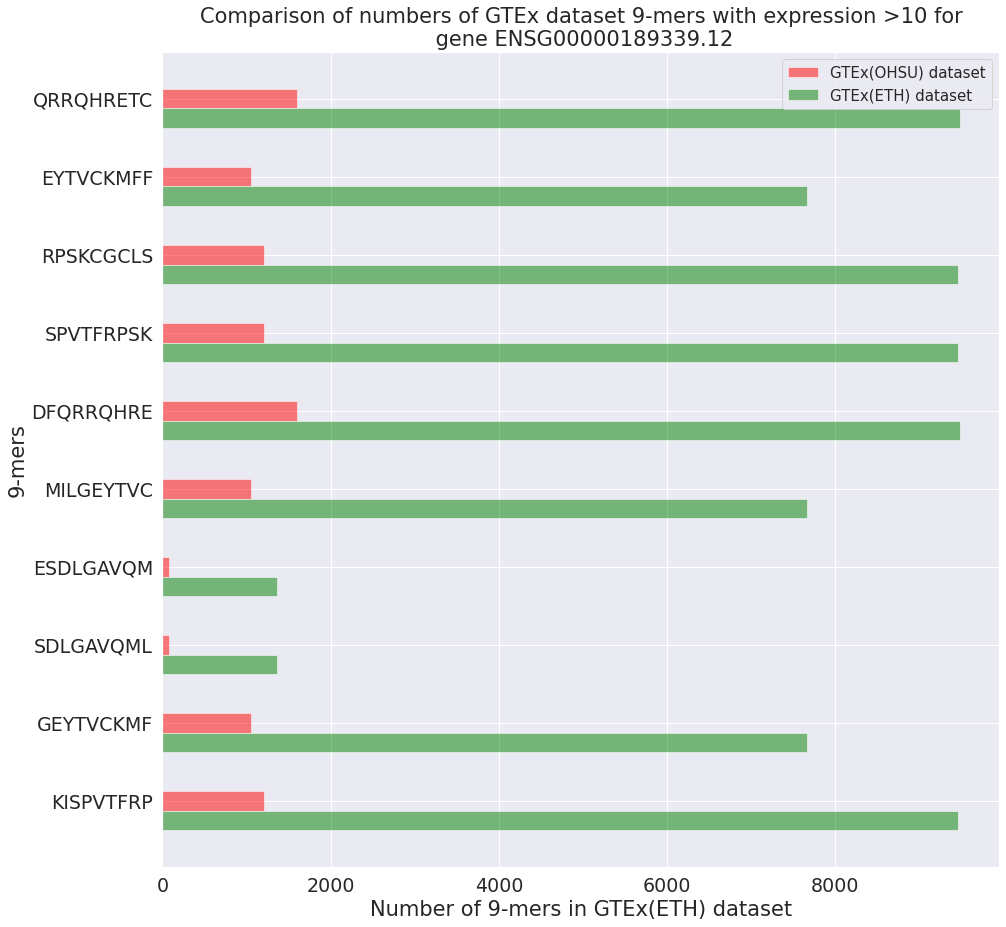

,gene_id,kmer,GTEx_brain_testis_over0_x,GTEx_brain_testis_over0_y
5,ENSG00000189339.12,KISPVTFRP,9462.0,1209.0
6,ENSG00000189339.12,GEYTVCKMF,7657.0,1052.0
7,ENSG00000189339.12,SDLGAVQML,1366.0,74.0
8,ENSG00000189339.12,ESDLGAVQM,1366.0,74.0
9,ENSG00000189339.12,MILGEYTVC,7657.0,1052.0
10,ENSG00000189339.12,DFQRRQHRE,9475.0,1605.0
11,ENSG00000189339.12,SPVTFRPSK,9462.0,1209.0
12,ENSG00000189339.12,RPSKCGCLS,9462.0,1209.0
13,ENSG00000189339.12,EYTVCKMFF,7657.0,1052.0
14,ENSG00000189339.12,QRRQHRETC,9476.0,1605.0


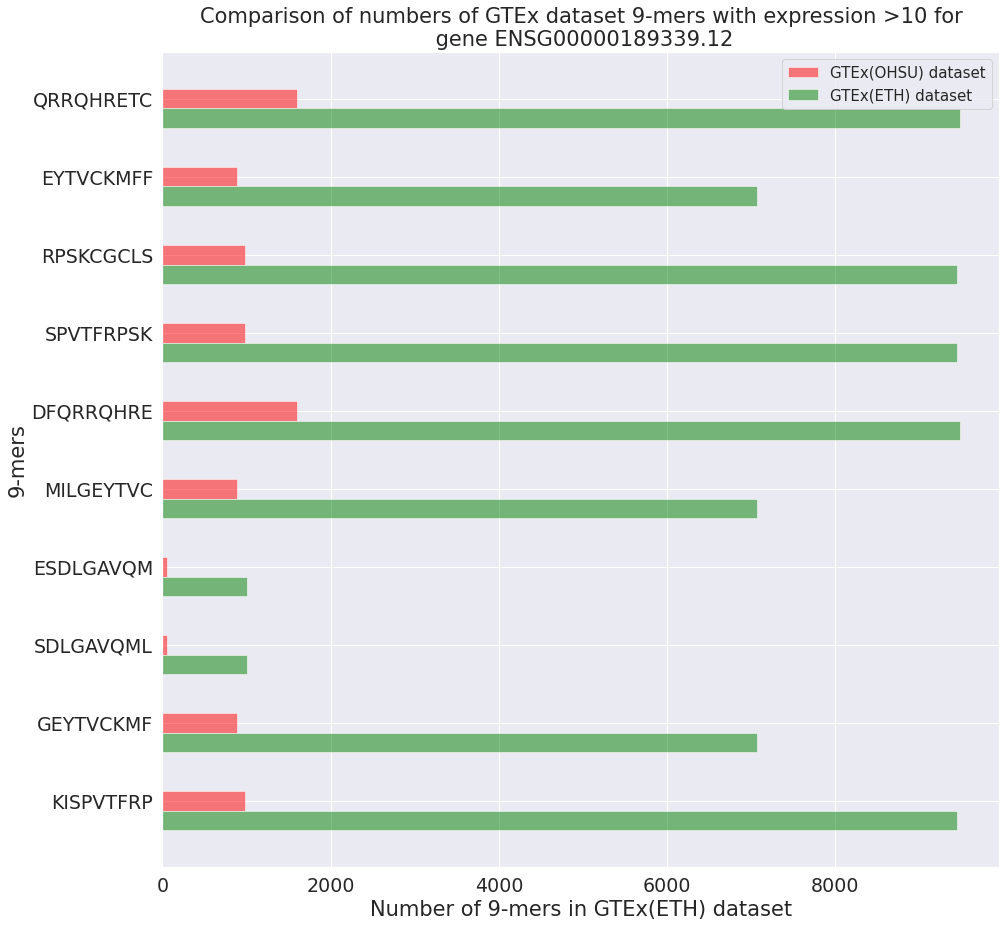

,gene_id,kmer,GTEx_brain_testis_over0_x,GTEx_brain_testis_over0_y
5,ENSG00000189339.12,KISPVTFRP,9462.0,1209.0
6,ENSG00000189339.12,GEYTVCKMF,7657.0,1052.0
7,ENSG00000189339.12,SDLGAVQML,1366.0,74.0
8,ENSG00000189339.12,ESDLGAVQM,1366.0,74.0
9,ENSG00000189339.12,MILGEYTVC,7657.0,1052.0
10,ENSG00000189339.12,DFQRRQHRE,9475.0,1605.0
11,ENSG00000189339.12,SPVTFRPSK,9462.0,1209.0
12,ENSG00000189339.12,RPSKCGCLS,9462.0,1209.0
13,ENSG00000189339.12,EYTVCKMFF,7657.0,1052.0
14,ENSG00000189339.12,QRRQHRETC,9476.0,1605.0


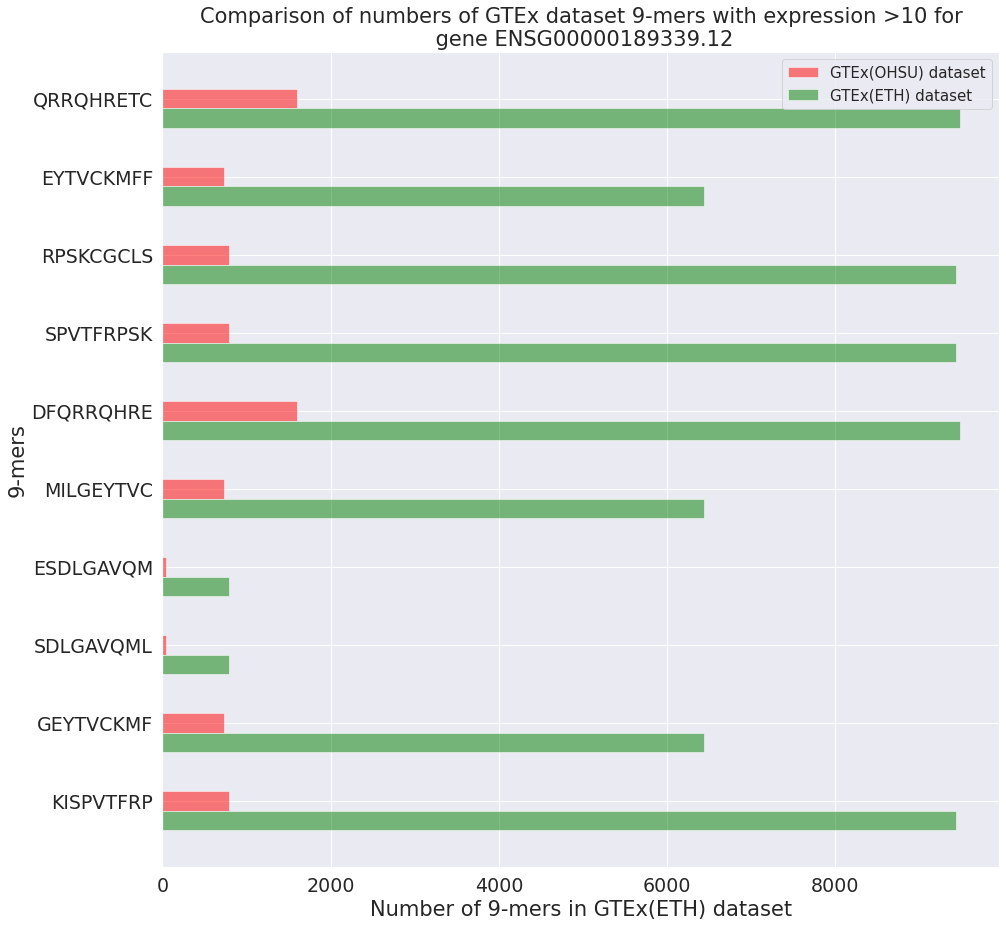

,gene_id,kmer,GTEx_brain_testis_over0_x,GTEx_brain_testis_over0_y
5,ENSG00000189339.12,KISPVTFRP,9462.0,1209.0
6,ENSG00000189339.12,GEYTVCKMF,7657.0,1052.0
7,ENSG00000189339.12,SDLGAVQML,1366.0,74.0
8,ENSG00000189339.12,ESDLGAVQM,1366.0,74.0
9,ENSG00000189339.12,MILGEYTVC,7657.0,1052.0
10,ENSG00000189339.12,DFQRRQHRE,9475.0,1605.0
11,ENSG00000189339.12,SPVTFRPSK,9462.0,1209.0
12,ENSG00000189339.12,RPSKCGCLS,9462.0,1209.0
13,ENSG00000189339.12,EYTVCKMFF,7657.0,1052.0
14,ENSG00000189339.12,QRRQHRETC,9476.0,1605.0


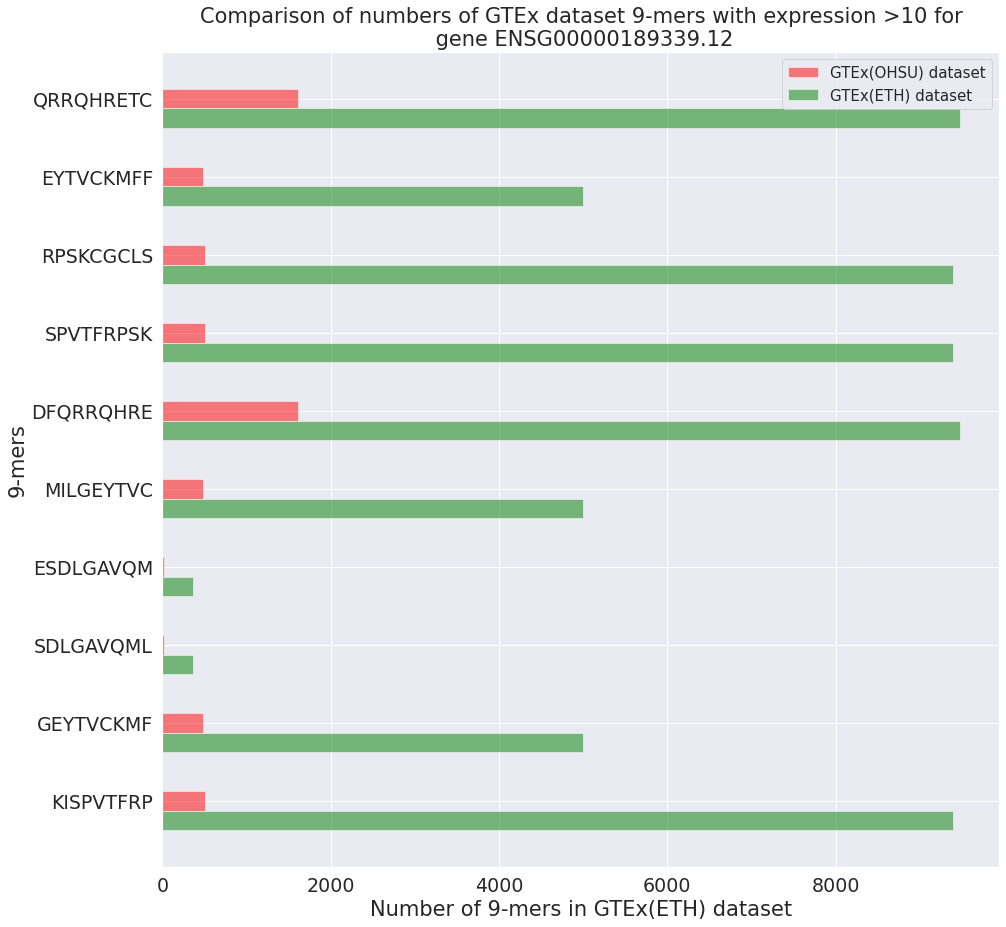

,gene_id,kmer,GTEx_brain_testis_over0_x,GTEx_brain_testis_over0_y
5,ENSG00000189339.12,KISPVTFRP,9462.0,1209.0
6,ENSG00000189339.12,GEYTVCKMF,7657.0,1052.0
7,ENSG00000189339.12,SDLGAVQML,1366.0,74.0
8,ENSG00000189339.12,ESDLGAVQM,1366.0,74.0
9,ENSG00000189339.12,MILGEYTVC,7657.0,1052.0
10,ENSG00000189339.12,DFQRRQHRE,9475.0,1605.0
11,ENSG00000189339.12,SPVTFRPSK,9462.0,1209.0
12,ENSG00000189339.12,RPSKCGCLS,9462.0,1209.0
13,ENSG00000189339.12,EYTVCKMFF,7657.0,1052.0
14,ENSG00000189339.12,QRRQHRETC,9476.0,1605.0


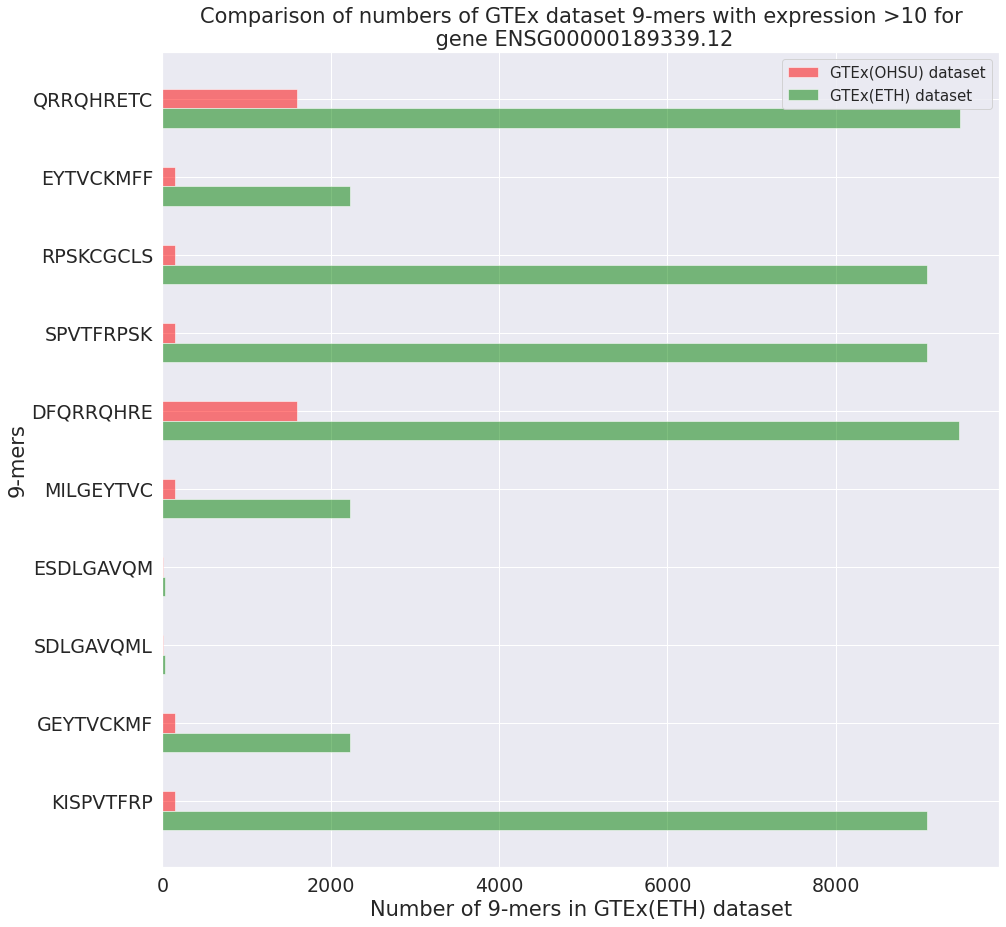

,gene_id,kmer,GTEx_brain_testis_over0_x,GTEx_brain_testis_over0_y
5,ENSG00000189339.12,KISPVTFRP,9462.0,1209.0
6,ENSG00000189339.12,GEYTVCKMF,7657.0,1052.0
7,ENSG00000189339.12,SDLGAVQML,1366.0,74.0
8,ENSG00000189339.12,ESDLGAVQM,1366.0,74.0
9,ENSG00000189339.12,MILGEYTVC,7657.0,1052.0
10,ENSG00000189339.12,DFQRRQHRE,9475.0,1605.0
11,ENSG00000189339.12,SPVTFRPSK,9462.0,1209.0
12,ENSG00000189339.12,RPSKCGCLS,9462.0,1209.0
13,ENSG00000189339.12,EYTVCKMFF,7657.0,1052.0
14,ENSG00000189339.12,QRRQHRETC,9476.0,1605.0


<Figure size 1080x1080 with 0 Axes>

In [93]:
if LANG == 'ENG':
    barplot_title = 'Comparison of numbers of GTEx dataset 9-mers with expression >0 for\n gene {gene_name}' #Comparison of numbers of GTEx 10 9-mers with expression {col}\n for gene {gene_name}
    xlabel = 'Number of 9-mers in GTEx(ETH) dataset'
    ylabel = '9-mers'
else:
    barplot_title = 'Comparison of numbers of GTEx dataset 9-mers with expression >10 for\n gene {gene_name}' #Comparison of numbers of GTEx 10 9-mers with expression {col}\n for gene {gene_name}
    xlabel = 'Number of 9-mers in GTEx(ETH) dataset'
    ylabel = '9-mers' 

def barplot_horizontal(df, gene_name, kmer_names, col):
    df = df[df['gene_id'] == gene_name]
    df = df[df['kmer'].isin(kmer_names)]
    x = df['kmer']
    
    bar_width = 0.25

    # Create the first barplot
    plt.barh(x, df[col + '_y'], label='GTEx(OHSU) dataset', height=bar_width, align='center', color=OHSU_COLOR, alpha = 0.5)

    # Shift the x-coordinates to the right to make space for the second barplot
    x_shift = np.arange(len(x)) - bar_width
    plt.barh(x_shift, df[col + '_x'], label='GTEx(ETH) dataset', height=bar_width, align='center', color=ETH_COLOR, alpha = 0.5)
    
    plt.xlabel(xlabel, fontsize=21)
    plt.ylabel(ylabel, fontsize=21)
    plt.xticks(fontsize=19)
    plt.yticks(fontsize=19)
    title = barplot_title.format(col = col, gene_name = gene_name)
    plt.title(title, fontsize=21)
    plt.legend(fontsize=15)
    #plt.figure(figsize=(50, 50))
    plt.show()
    save_plot(title)
    return df
gene_name = gene_names[0]
kmer_names = df[df['gene_id'] == gene_name]['kmer'].values[5:15]
col = 'GTEx_brain_testis_over0'
for gtex, num in zip(gtex_columns, nums):    
    df_part = barplot_horizontal(df, gene_name, kmer_names, gtex)
    display(df_part[['gene_id', 'kmer', col + '_x', col + '_y']])

In [43]:
df_part[['gene_id', 'kmer', 'junction_coordinate', col +'_x', col + '_y']]

,gene_id,kmer,junction_coordinate,GTEx_brain_testis_over0_x,GTEx_brain_testis_over0_y
5,ENSG00000189339.12,KISPVTFRP,1660111:1668326,9462.0,1209.0
6,ENSG00000189339.12,GEYTVCKMF,1670151:1675462,7657.0,1052.0
7,ENSG00000189339.12,SDLGAVQML,1676199:1676494,1366.0,74.0
8,ENSG00000189339.12,ESDLGAVQM,1676199:1676494,1366.0,74.0
9,ENSG00000189339.12,MILGEYTVC,1670151:1675462,7657.0,1052.0
10,ENSG00000189339.12,DFQRRQHRE,1666019:1668326,9475.0,1605.0
11,ENSG00000189339.12,SPVTFRPSK,1660111:1668326,9462.0,1209.0
12,ENSG00000189339.12,RPSKCGCLS,1660111:1668326,9462.0,1209.0
13,ENSG00000189339.12,EYTVCKMFF,1670151:1675462,7657.0,1052.0
14,ENSG00000189339.12,QRRQHRETC,1666019:1668326,9476.0,1605.0
